In [47]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import os
import pandas as pd
import time
from datetime import datetime

In [60]:
def cleanduplicates (df):

    df = df

    iterlist = list(range(0,len(df)))
    iterlist.reverse()

    #pops out the duplicated datetimes
    for i in iterlist:
        if i > 0:
            a = (df.at[i,'Text'] == df.at[i-1,'Text'])
            b = type(df.at[i,'DateTime']) != str
            if a and b:    
                df.drop(index = i, inplace= True)
                print("popped")

    #converts to datetime
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S UTC%z')
    df['DateTime'] = df.DateTime.dt.tz_convert('Asia/Singapore')

    return df.reset_index()

def Nan_to_names(df):
    N = ''
    for i in range(0,len(df)):
        name1 = df.at[i,'Name']

        # if name is not a string, then gives it the stored name
        if type(name1) != str :
            df.at[i,'Name'] = N
        
        # if name is a string, and if it is not same as stored name, 
        # change stored name
        elif name1 != N:
            N = name1

    return df

def timer1(df):
    df['ReplySpeed'] = 0
    df['DoubleText'] = False

    # calculates the reply speed and if it is a double text
    for i in range(1,len(df)):
        if df.at[i,'Name'] == df.at[i-1,'Name'] :
            df.at[i,'DoubleText'] = True
        df.at[i,'ReplySpeed'] = (df.at[i,'DateTime'] - df.at[i-1,'DateTime']).total_seconds()/60
    return df

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

def grapher(df):

    # Convert 'Reply Speed' to seconds for plotting
    df['Reply Speed (Mins)'] = df['ReplySpeed']

    # Plotting
    fig, ax = plt.subplots()

    # Scatter plot with two different colors based on "Name"
    for name, group in df.groupby('Name'):
        ax.scatter(group['DateTime'], group['Reply Speed (Mins)'], label=name)

    # Customize plot
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Reply Speed (Mins)')
    ax.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show plot
    plt.show()


def word_cloud(df): 

    text1 = ''

    # makes the string
    for i in range(0,len(df)):
        text1 = text1 + ' ' + df.at[i,'Text']

    # creates the wordcloud
    wc2 = WordCloud(background_color='white', colormap = 'binary',
        stopwords = ['meta'], width = 800, height = 500).generate(text1)
    plt.clf()
    plt.axis("off")
    plt.imshow(wc2)

In [85]:
folder_path = input("Key in folder path containing telegram messages")

contents = os.listdir(folder_path)

print(contents)

message_list = [x for x in contents if 'messages' in x]

message_list2 = ['messages.html'] + ['messages' + str(x) + '.html' for x in range(2,len(message_list) + 1)]

print(message_list2)

['css', 'images', 'js', 'messages.html', 'messages2.html']
['messages.html', 'messages2.html']


In [86]:
df1 = pd.DataFrame(columns=[
    'DateTime',
    'Name',
    'Text',
    'Forwarded',
    'Media'
])

for i in range(0,len(message_list2)):
    file1 = os.path.join(folder_path,message_list[i] ) 
    print(i)

    start1 = time.time()


    with open( file1 ) as fp:
        soup = BeautifulSoup(fp, 'html.parser')

    #This part looks at every page
    for layer1 in soup.body.find_all('div'): 
        #This part looks at the body of each message
        for layer2 in layer1.find_all('div', class_='body'):
            #print("__________________")
            #print(layer2)
            
            index1 = len(df1)

            #This part looks at the date and type of the message
            for title in layer2.find_all('div', class_='pull_right date details'):
                df1.at[index1,'DateTime'] = title.get('title')

            for title in layer2.find_all('div', class_='forwarded body'):
                df1.at[index1,'Forwarded'] = True

            for title in layer2.find_all('div', class_='media_wrap clearfix'):
                df1.at[index1,'Media'] = True

            #This part looks at the element of the message

            for text1 in layer2.find_all('div', class_='text'):
                df1.at[index1,'Text'] = text1.text.strip()
            for name1 in layer2.find_all('div', class_='from_name'):
                df1.at[index1,'Name'] = name1.text.strip()
    stop1 = time.time()
    
    print(i, stop1 - start1)

0
0 2.726433038711548
1
1 0.2005167007446289


In [87]:
recipient = soup.body.div.find('div', class_='text bold').text.strip()
print(recipient)

Nan_to_names(cleanduplicates ( df1 ))

df_textonly = df1.loc[df1['Forwarded']!=True].loc[df1['Media']!=True].reset_index()

timer1(df_textonly)



GY lse sla
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped
popped


,index,DateTime,Name,Text,Forwarded,Media,ReplySpeed,DoubleText
0,0,2024-06-28 09:22:29+08:00,10 9 8,hello! i’m hauwei from sla! are u going to try...,NaN,NaN,0.000000,False
1,1,2024-06-28 10:48:39+08:00,GY lse sla,Hey Hau Wei!,NaN,NaN,86.166667,False
2,2,2024-06-28 10:48:45+08:00,NaN,Yes I am! But heard from Shawn,NaN,NaN,0.100000,False
3,3,2024-06-28 10:48:53+08:00,NaN,Got not much place left woohoo 🥹🥹,NaN,NaN,0.133333,False
4,4,2024-06-28 10:49:22+08:00,NaN,U are also looking for one too in the halls?,NaN,NaN,0.483333,False
...,...,...,...,...,...,...,...,...
3947,4258,2024-10-18 04:36:30+08:00,GY lse sla,Okkkkk no wiz’s,NaN,NaN,13.516667,False
3948,4259,2024-10-18 23:01:50+08:00,10 9 8,what are u doing today,NaN,NaN,1105.333333,False
3949,4260,2024-10-18 23:01:55+08:00,NaN,want go imperial war museum?,NaN,NaN,0.083333,False
3950,4261,2024-10-18 23:28:12+08:00,GY lse sla,In school till 4!,NaN,NaN,26.283333,False


In [88]:
df_textonly.loc[df_textonly['ReplySpeed']<0]

,index,DateTime,Name,Text,Forwarded,Media,ReplySpeed,DoubleText
934,1004,2024-06-28 09:22:29+08:00,10 9 8,hello! i’m hauwei from sla! are u going to try...,NaN,NaN,-154631.416667,True
1868,2008,2024-06-28 09:22:29+08:00,10 9 8,hello! i’m hauwei from sla! are u going to try...,NaN,NaN,-154631.416667,True
2802,3012,2024-06-28 09:22:29+08:00,10 9 8,hello! i’m hauwei from sla! are u going to try...,NaN,NaN,-154631.416667,True
3790,4081,2024-10-13 18:33:57+08:00,10 9 8,it’s here!,NaN,NaN,-7494.350000,False
3844,4142,2024-10-13 18:33:57+08:00,10 9 8,it’s here!,NaN,NaN,-7494.350000,False
3898,4203,2024-10-13 18:33:57+08:00,10 9 8,it’s here!,NaN,NaN,-7494.350000,False


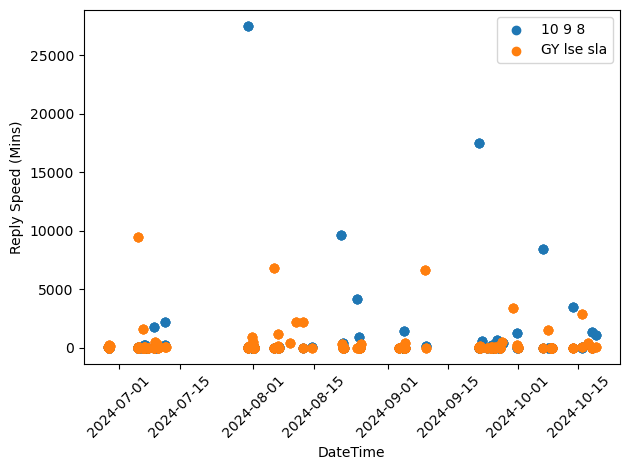

In [89]:
df2 = df_textonly.loc[df_textonly['DoubleText'] == False]
df2 = df2.loc[df2['ReplySpeed'] > 0].loc[df2['ReplySpeed'] < 100000].reset_index()

grapher(df2)

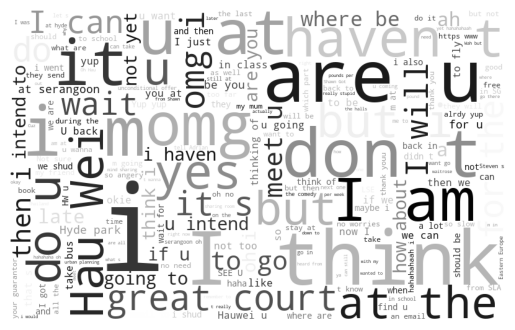

In [90]:
df2 = df_textonly[['Text']]
df2 = df2.reset_index()

word_cloud(df2)